# Can Happiness be Predicted?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv("2017.csv")  #reading the world happiness report

In [3]:
cols= ['Country','Happiness.Rank','Happiness.Score'] #taking out the name of the country,rank and score

In [4]:
df = df[cols] #creating new dataframe for the three columns
df.head(2)

,Country,Happiness.Rank,Happiness.Score
0,Norway,1,7.537
1,Denmark,2,7.522


In [5]:
df_world = pd.read_csv("countries of the world.csv") #reading additional information regarding countries from the world bank report
df_world.head(2)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"


In [6]:
#droping some columns out
df_world= df_world.drop(columns=['Arable (%)','Crops (%)','Other (%)'])

In [7]:
#Although the country names in the dataframes are written in identical ways, some of them have "space" gaps
# I am using the str.strip() function to close space gaps either bofore or after the country name
df_world['Country'] = df_world['Country'].str.strip()
df['Country']=df['Country'].str.strip()

In [8]:
#merging the two dataframe based on the country name
df_happy = df.merge(df_world,on=['Country'], how='inner')
df_happy.head(2)

,Country,Happiness.Rank,Happiness.Score,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Norway,1,7.537,WESTERN EUROPE,4610820,323802,"14,2","7,77","1,74","3,7",37800.0,"100,0","461,7",3,"11,46","9,4","0,021","0,415","0,564"
1,Denmark,2,7.522,WESTERN EUROPE,5450661,43094,"126,5","16,97","2,48","4,56",31100.0,"100,0","614,6",3,"11,13","10,36","0,018","0,246","0,735"


In [9]:
#replacing ',' in '.' and changing strings into floats
cols= df_happy.columns
for col in cols:
    try: 
        df_happy[col]= df_happy[col].str.replace(',','.')
        df_happy[col]= df_happy[col].astype(float)
    except:
        pass

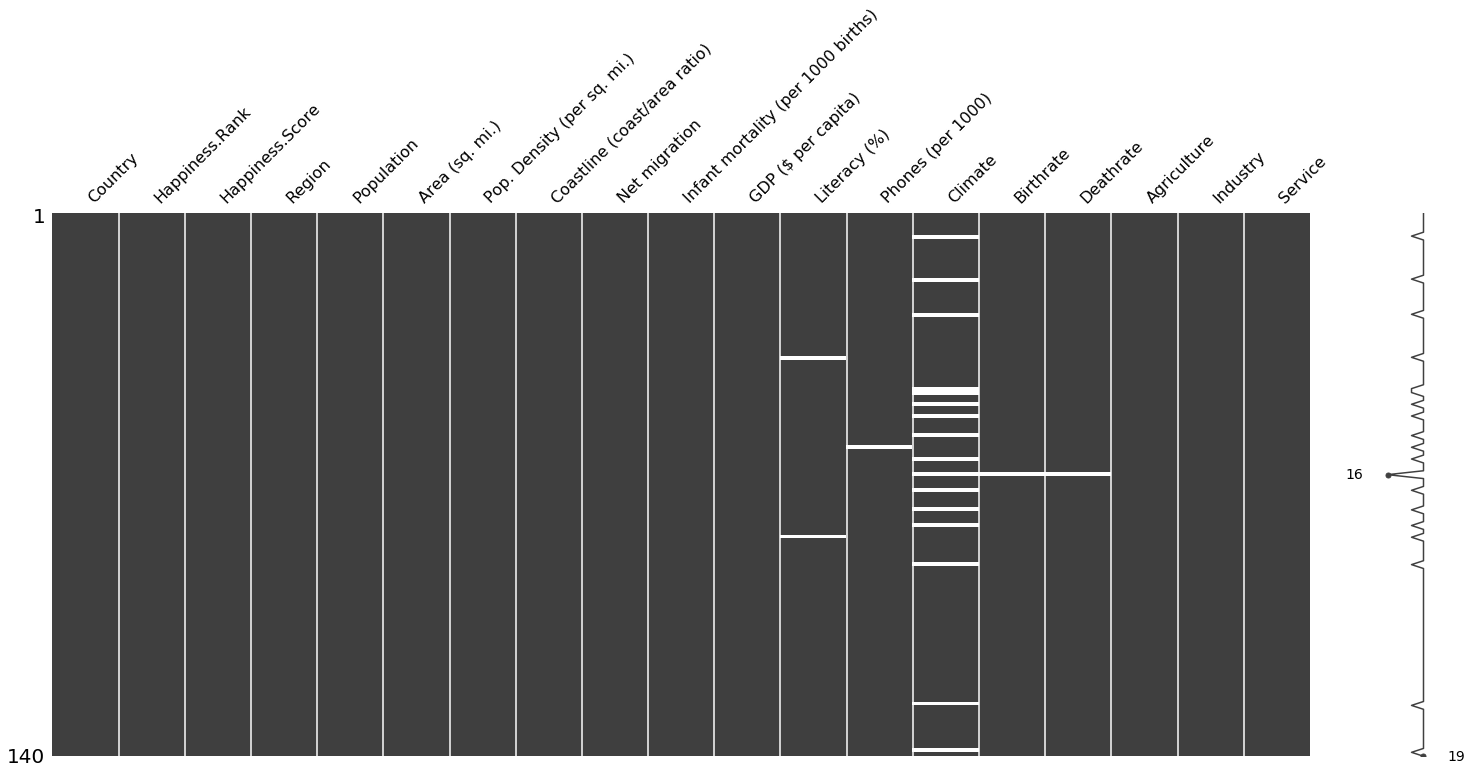

In [10]:
#checing visually to null values
%matplotlib inline
msno.matrix(df_happy);

In [11]:
df_happy[df_happy['Literacy (%)'].isnull()] #checking details of null values

,Country,Happiness.Rank,Happiness.Score,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
37,Slovakia,40,6.098,EASTERN EUROPE,5439448,48845,111.4,0.0,0.30,7.41,13300.0,NaN,220.1,3.0,10.65,9.45,0.035,0.294,0.672
83,Macedonia,92,5.175,EASTERN EUROPE,2050554,25333,80.9,0.0,-1.45,10.09,6700.0,NaN,260.0,3.0,12.02,8.77,0.118,0.319,0.563


In [12]:
#update manualy from online sources
df_happy.at[83, 'Literacy (%)']=97.8 # based on https://www.indexmundi.com/macedonia/literacy.html
df_happy.at[37, 'Literacy (%)']=99.6 #https://knoema.com/atlas/Slovakia/topics/Education/Literacy/Adult-literacy-rate

In [13]:
df_happy[df_happy['Phones (per 1000)'].isnull()]

,Country,Happiness.Rank,Happiness.Score,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
60,Cyprus,65,5.621,NEAR EAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,97.6,NaN,3.0,12.56,7.68,0.037,0.198,0.765


In [14]:
#update manualy from online sources
df_happy.at[60, 'Phones (per 1000)']=330.56 #based on https://www.nationmaster.com/country-info/stats/Media/Telecoms/Telephone-lines-per-1000
df_happy[60:61] 

,Country,Happiness.Rank,Happiness.Score,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
60,Cyprus,65,5.621,NEAR EAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,97.6,330.56,3.0,12.56,7.68,0.037,0.198,0.765


In [15]:
df_happy[df_happy['Birthrate'].isnull()]

,Country,Happiness.Rank,Happiness.Score,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
67,Serbia,73,5.395,EASTERN EUROPE,9396411,88361,106.3,0.0,-1.33,12.89,2200.0,93.0,285.8,NaN,NaN,NaN,0.166,0.255,0.579


In [16]:
#update manualy from online sources
df_happy.at[67, 'Birthrate']=9.0  #indexmundi.com
df_happy.at[67, 'Deathrate']=13.6 #indexmundi.com

In [19]:
print (len(df_happy[df_happy['Climate'].isnull()]))
df_happy[df_happy['Climate'].isnull()].head(3)

16


,Country,Happiness.Rank,Happiness.Score,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
6,Canada,7,7.316,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,NaN,10.78,7.80,0.022,0.294,0.684
17,Luxembourg,18,6.863,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,515.4,NaN,11.94,8.41,0.010,0.130,0.860
26,Malta,27,6.527,WESTERN EUROPE,400214,316,1266.5,62.28,2.07,3.89,17700.0,92.8,505.0,NaN,10.22,8.10,0.030,0.230,0.740


In [20]:
#because the number of Null values of Climate is relativly big it will reqire a lot of work to update manualy
#instead I am going to replace the missing values with the climatee mode of their region
#the first thing I am doing is to find the climate mode for each region

reg_mode= df_happy.groupby(['Region']).agg(lambda x:x.value_counts().index[0])[['Climate']].reset_index()

In [21]:
#now I  am creating a dictionary of the region and climate mode
reg_dict={}
regions= list(reg_mode.Region)
climates= list(reg_mode.Climate)
for i in range(len(regions)):
    reg_dict[regions[i]]=climates[i]

In [22]:
reg_dict

{'ASIA (EX. NEAR EAST)         ': 2.0,
 'BALTICS                            ': 3.0,
 'C.W. OF IND. STATES ': 4.0,
 'EASTERN EUROPE                     ': 3.0,
 'LATIN AMER. & CARIB    ': 2.0,
 'NEAR EAST                          ': 1.0,
 'NORTHERN AFRICA                    ': 1.0,
 'NORTHERN AMERICA                   ': 3.0,
 'OCEANIA                            ': 1.0,
 'SUB-SAHARAN AFRICA                 ': 2.0,
 'WESTERN EUROPE                     ': 3.0}

In [23]:
#creating a list of all the regions in the Region columns
reg_col= list(df_happy.Region)

In [24]:
#creating a new list where each country receive their climte mode
reg_clim= []
for a in reg_col:
    reg_clim.append(reg_dict[a])

In [25]:
#creating new column in the data frame with the regional climate 
df_happy['Regional_Climate']= reg_clim

In [26]:
#countries with no data on their climate receive their regional climate mode
df_happy['Climate']= df_happy['Climate'].fillna(df_happy['Regional_Climate'])

In [27]:
#deleting the 'Regional Climate' column
try:
    del df_happy['Regional_Climate']
except:
    pass

In [28]:
#Checkig numericly that there are not anymore Null vlaues
df_happy.describe().head(1)

,Happiness.Rank,Happiness.Score,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0


Our Data is ready to work!

In [30]:
#starting to check for corrlation to find multilinearty and confounding variable
abs(df_happy.corr())>0.7

,Happiness.Rank,Happiness.Score,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Happiness.Rank,True,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False
Happiness.Score,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
Population,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Area (sq. mi.),False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Pop. Density (per sq. mi.),False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Coastline (coast/area ratio),False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Net migration,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Infant mortality (per 1000 births),True,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False
GDP ($ per capita),True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
Literacy (%),False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False


In [31]:
df_happy.corr()['Agriculture'].head()

Happiness.Rank                0.679832
Happiness.Score              -0.671004
Population                   -0.020894
Area (sq. mi.)               -0.112560
Pop. Density (per sq. mi.)   -0.124620
Name: Agriculture, dtype: float64

In [32]:
df_happy.corr()['Net migration'].head()

Happiness.Rank               -0.219667
Happiness.Score               0.225693
Population                   -0.025311
Area (sq. mi.)                0.065651
Pop. Density (per sq. mi.)    0.247035
Name: Net migration, dtype: float64

In [33]:
#I decided to drop Agriculture and Net migration (and happines_rank which is not a continuos value)
df_happy = df_happy.drop(columns=['Happiness.Rank','Agriculture','Net migration']) 
df_happy.head(2)

,Country,Happiness.Score,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Climate,Birthrate,Deathrate,Industry,Service
0,Norway,7.537,WESTERN EUROPE,4610820,323802,14.2,7.77,3.70,37800.0,100.0,461.7,3.0,11.46,9.40,0.415,0.564
1,Denmark,7.522,WESTERN EUROPE,5450661,43094,126.5,16.97,4.56,31100.0,100.0,614.6,3.0,11.13,10.36,0.246,0.735


In [34]:
#looking for problematic columns names and rename them
df_happy.columns

Index(['Country', 'Happiness.Score', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Climate', 'Birthrate',
       'Deathrate', 'Industry', 'Service'],
      dtype='object')

In [35]:
df_happy = df_happy.rename(index=str, columns={"Area (sq. mi.)": "Area", "Pop. Density (per sq. mi.)": "Pop_Density"})
df_happy = df_happy.rename(index=str, columns={"Infant mortality (per 1000 births)": "Infant mortality", "GDP ($ per capita)": "GDP"})
df_happy = df_happy.rename(index=str, columns = {'Coastline (coast/area ratio)':'Coastline','Infant mortality': "Infant_mortality"})
df_happy = df_happy.rename(index=str, columns={"Literacy (%)": "Literacy", "Phones (per 1000)": "Phones"})
df_happy = df_happy.rename(index=str, columns={"Happiness.Score":"Happiness_Score"})
df_happy.head(2)

,Country,Happiness_Score,Region,Population,Area,Pop_Density,Coastline,Infant_mortality,GDP,Literacy,Phones,Climate,Birthrate,Deathrate,Industry,Service
0,Norway,7.537,WESTERN EUROPE,4610820,323802,14.2,7.77,3.70,37800.0,100.0,461.7,3.0,11.46,9.40,0.415,0.564
1,Denmark,7.522,WESTERN EUROPE,5450661,43094,126.5,16.97,4.56,31100.0,100.0,614.6,3.0,11.13,10.36,0.246,0.735


In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [37]:
#getting first impression of the linear regretion
X = 'Population + Area + Pop_Density + Coastline +Infant_mortality + GDP + Literacy + Phones + Climate + Birthrate + Deathrate + Industry + Service'

In [38]:
# building a linear regression model using statsmodel 
lr_model = ols(formula='Happiness_Score ~'+X, data=df_happy).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     26.86
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           3.26e-30
Time:                        18:00:41   Log-Likelihood:                -123.17
No. Observations:                 140   AIC:                             274.3
Df Residuals:                     126   BIC:                             315.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.8169      0.890      4.288      0.000       2.055       5.579
Population       -6.463e-10   4.08e-10     -1.582      0.116   -1.45e-09    1.62e-10
Area              4.434e-08   2.75e-08      1.613      0.109   -1.01e-08    9.88e-08
Pop_Density      -6.157e-05      0.000     -0.562      0.575      -0.000       0.000
Coastline            0.0014      0.010      0.137      0.891      -0.018       0.021
Infant_mortality     0.0066      0.004      1.670      0.097      -0.001       0.014
GDP               4.323e-05   1.15e-05      3.753      0.000    2.04e-05     6.6e-05
Literacy             0.0097      0.005      2.106      0.037       0.001       0.019
Phones               0.0011      0.001      1.451      0.149      -0.000       0.003
Climate             -0.0001      0.088     -0.001      0.999      -0.173       0.173
Birthrate           -0.0089      0.012     -0.721      0.472      -0.033       0.016
Deathrate           -0.0757      0.015     -4.955      0.000      -0.106      -0.045
Industry             1.0590      0.653      1.622      0.107      -0.233       2.351
Service              0.9984      0.754      1.324      0.188      -0.494       2.491
==============================================================================
Omnibus:                        0.776   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.895
Skew:                          -0.156   Prob(JB):                        0.639
Kurtosis:                       2.764   Cond. No.                     3.53e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

we can see that most of the variables have very high p value

In [39]:
# we are creating a variables dataframe
df_var= df_happy.drop(columns=['Country', 'Happiness_Score'])
df_var.head(2)

,Region,Population,Area,Pop_Density,Coastline,Infant_mortality,GDP,Literacy,Phones,Climate,Birthrate,Deathrate,Industry,Service
0,WESTERN EUROPE,4610820,323802,14.2,7.77,3.70,37800.0,100.0,461.7,3.0,11.46,9.40,0.415,0.564
1,WESTERN EUROPE,5450661,43094,126.5,16.97,4.56,31100.0,100.0,614.6,3.0,11.13,10.36,0.246,0.735


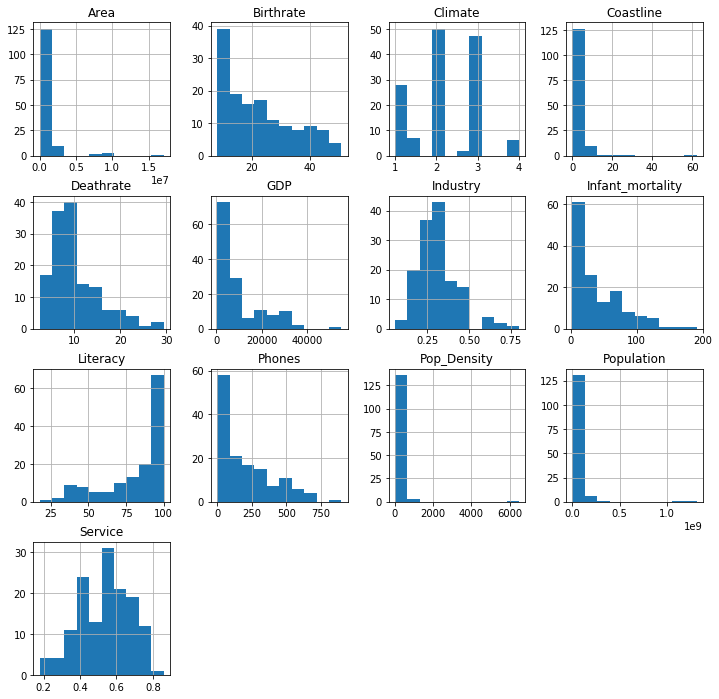

In [40]:
#printing histograms of all variables
df_var[['Region','Population','Area','Pop_Density','Coastline','Infant_mortality','GDP','Literacy','Phones','Climate','Birthrate','Deathrate','Industry','Service']].hist(figsize  = [12, 12]);
  

C:\Users\homer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


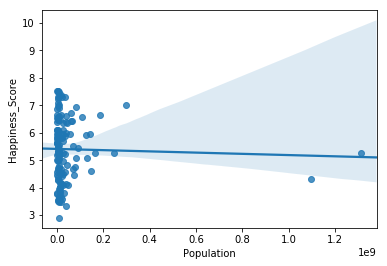

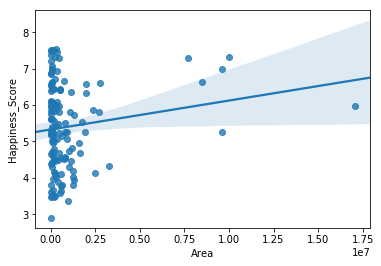

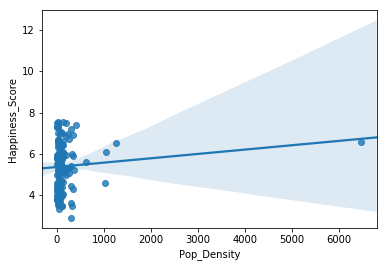

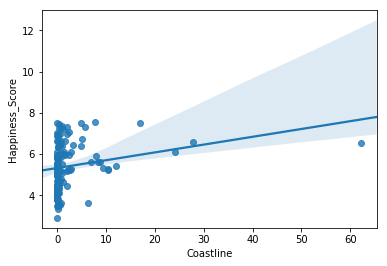

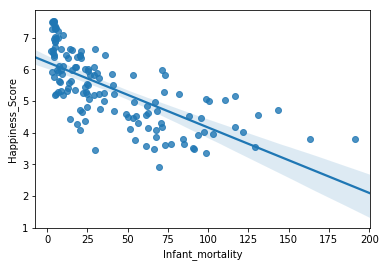

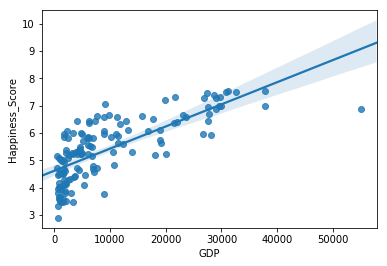

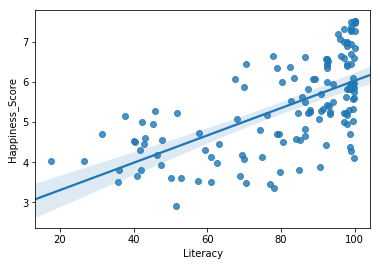

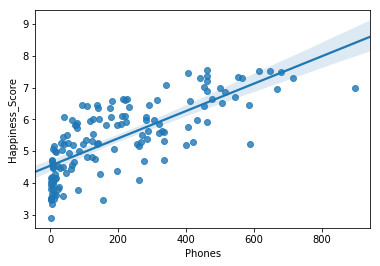

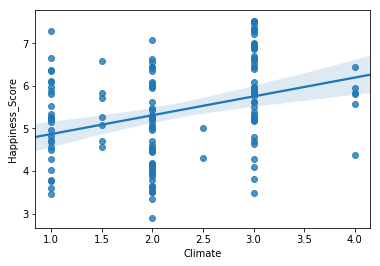

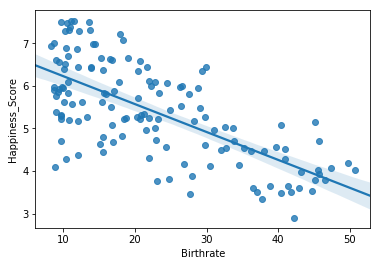

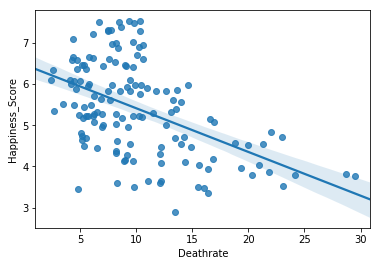

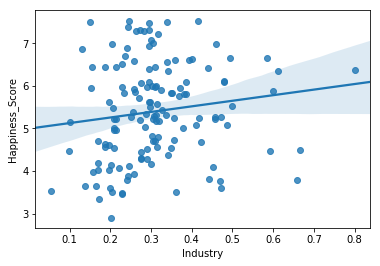

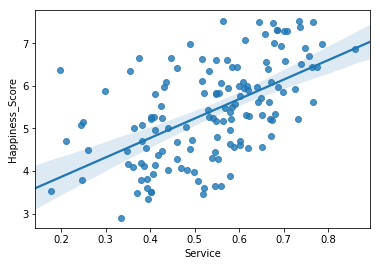

In [41]:
#Cheking the correlation of each on of the variables with the Happines Score
df_var.columns = df_var.columns.str.strip()

for i in df_var.columns:
    if i== "Region":
        pass
    else:
        sns.regplot(x= str(i), y="Happiness_Score", data=df_happy);
        plt.show();

We can see many outliers in issues like population (Chine, India), Area (Russia), coastline and population density.
Also in GDP the diffrences are significant. We will log these columns and try to get better results.

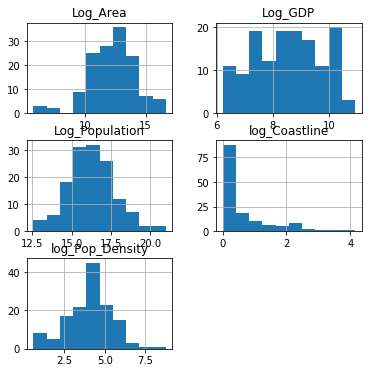

In [42]:
import numpy as np
data_log = pd.DataFrame([])
data_log["Log_Population"] = np.log(df_happy["Population"])
data_log["Log_Area"] = np.log(df_happy["Area"])
data_log["log_Pop_Density"] = np.log(df_happy["Pop_Density"])
data_log["log_Coastline"] = np.log(1+df_happy["Coastline"])
data_log["Log_GDP"] = np.log(df_happy["GDP"])

data_log.hist(figsize  = [6, 6]);

In [43]:
#the distribution look better in all of them so we will update the dataframe
df_happy['Population'] = data_log["Log_Population"]
df_happy['Area'] = data_log["Log_Area"]
df_happy['Pop_Density']=data_log["log_Pop_Density"]
df_happy['Coastline']=data_log["log_Coastline"]
df_happy['GDP']=data_log["Log_GDP"]

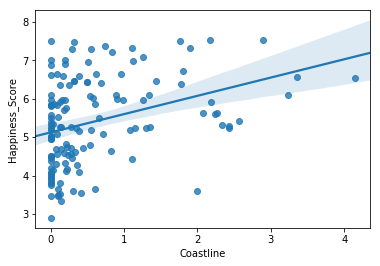

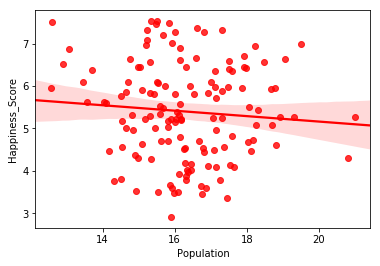

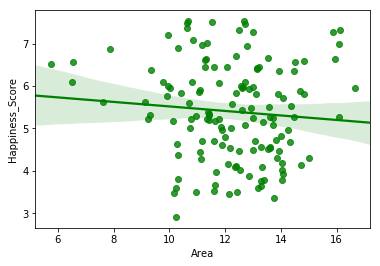

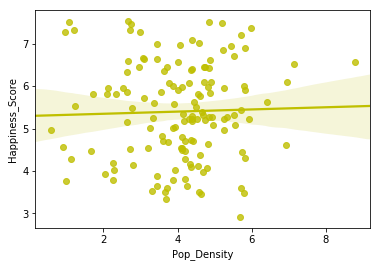

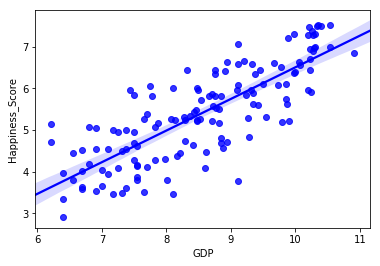

In [44]:
plt.figure()
sns.regplot(x= 'Coastline', y="Happiness_Score", data=df_happy);
plt.figure()
sns.regplot(x= 'Population', y="Happiness_Score", data=df_happy, color = 'r');
plt.figure()
sns.regplot(x= 'Area', y="Happiness_Score", data=df_happy, color='g');
plt.figure()
sns.regplot(x= 'Pop_Density', y="Happiness_Score", data=df_happy, color='y');
plt.figure()
sns.regplot(x= 'GDP', y="Happiness_Score", data=df_happy, color='b');


In [45]:
#only in GDP there is significant correlation (and modest one in coast line). There for we will drop area, population and density from our data frame.
df_happy= df_happy.drop(columns=['Population', 'Area','Pop_Density'])

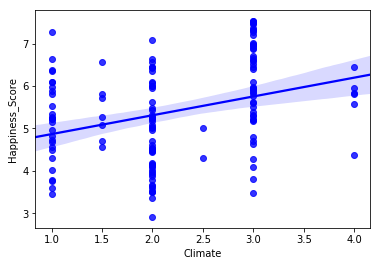

In [46]:
#What about Climate?
sns.regplot(x= "Climate", y="Happiness_Score", data=df_happy, color='b');

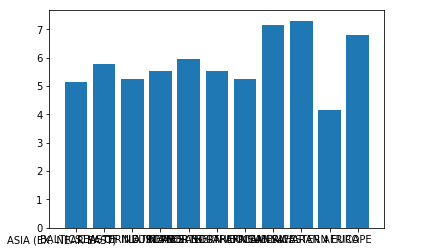

In [47]:
#and Region?
df_regions = df_happy.groupby(['Region']).mean()
df_regions = df_regions.reset_index()
df_regions = df_regions[['Region','Happiness_Score']]
df_regions.columns = df_regions.columns.str.strip()
plt.bar('Region','Happiness_Score',data=df_regions);

In [48]:
#Because climate and region are categorical values,  I will Convert them into dummy/indicator variables
climate_dummies = pd.get_dummies(df_happy["Climate"], prefix="climate")
region_dummies= pd.get_dummies(df_happy["Region"], prefix="region")

In [49]:
#I will clean the titles from gaps
region_dummies.columns  = region_dummies.columns.str.strip()
region_dummies.columns

Index(['region_ASIA (EX. NEAR EAST)', 'region_BALTICS',
       'region_C.W. OF IND. STATES', 'region_EASTERN EUROPE',
       'region_LATIN AMER. & CARIB', 'region_NEAR EAST',
       'region_NORTHERN AFRICA', 'region_NORTHERN AMERICA', 'region_OCEANIA',
       'region_SUB-SAHARAN AFRICA', 'region_WESTERN EUROPE'],
      dtype='object')

In [50]:
#dropping the original columns
df_happy= df_happy.drop(["Climate","Region"], axis=1)

In [51]:
#add the nee dummy columns to the working Dataframe
df_happy=pd.concat([df_happy,climate_dummies,region_dummies],axis=1)
df_happy.head(3)

,Country,Happiness_Score,Coastline,Infant_mortality,GDP,Literacy,Phones,Birthrate,Deathrate,Industry,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,Norway,7.537,2.171337,3.70,10.540064,100.0,461.7,11.46,9.40,0.415,...,0,0,0,0,0,0,0,0,0,1
1,Denmark,7.522,2.888704,4.56,10.344963,100.0,614.6,11.13,10.36,0.246,...,0,0,0,0,0,0,0,0,0,1
2,Iceland,7.504,1.763017,3.31,10.338511,99.9,647.7,13.64,6.72,0.150,...,0,0,0,0,0,0,0,0,0,1


In [52]:
#renaming the columns
df_happy = df_happy.rename(index=str, columns={"climate_1.0":"climate_1","climate_1.5":"climate_1_5"})
df_happy = df_happy.rename(index=str, columns={"climate_2.0":"climate_2","climate_2.5":"climate_2_5"})
df_happy = df_happy.rename(index=str, columns={"climate_3.0":"climate_3","climate_4.0":"climate_4"})
df_happy = df_happy.rename(index=str, columns={"region_ASIA (EX. NEAR EAST)":"region_ASIA","region_C.W. OF IND. STATES":"region_IND_STATES"})
df_happy = df_happy.rename(index=str, columns={"region_EASTERN EUROPE":"region_EASTERN_EUROPE","region_LATIN AMER. & CARIB":"region_LATIN_AMER_CARIB"})
df_happy = df_happy.rename(index=str, columns={"region_NEAR EAST":"region_NEAR_EAST","region_NORTHERN AFRICA":"region_NORTHERN_AFRICA"})
df_happy = df_happy.rename(index=str, columns={"region_NORTHERN AMERICA":"region_NORTHERN_AMERICA","region_SUB-SAHARAN AFRICA":"region_SUB_SAHARAN_AFRICA"})      
df_happy = df_happy.rename(index=str, columns={"region_WESTERN EUROPE":"region_WESTERN_EUROPE"})          

In [53]:
df_happy.columns

Index(['Country', 'Happiness_Score', 'Coastline', 'Infant_mortality', 'GDP',
       'Literacy', 'Phones', 'Birthrate', 'Deathrate', 'Industry', 'Service',
       'climate_1', 'climate_1_5', 'climate_2', 'climate_2_5', 'climate_3',
       'climate_4', 'region_ASIA', 'region_BALTICS', 'region_IND_STATES',
       'region_EASTERN_EUROPE', 'region_LATIN_AMER_CARIB', 'region_NEAR_EAST',
       'region_NORTHERN_AFRICA', 'region_NORTHERN_AMERICA', 'region_OCEANIA',
       'region_SUB_SAHARAN_AFRICA', 'region_WESTERN_EUROPE'],
      dtype='object')

In [54]:
#dropping one dummy and prepare the data for the ols test
d_climate = 'climate_1 + climate_1_5+ climate_2 + climate_3 + climate_4+'
d_region = 'region_ASIA + region_IND_STATES +region_EASTERN_EUROPE + region_LATIN_AMER_CARIB + region_NEAR_EAST + region_NORTHERN_AFRICA + region_NORTHERN_AMERICA + region_OCEANIA +region_SUB_SAHARAN_AFRICA + region_WESTERN_EUROPE'

In [55]:
X = 'Coastline +Infant_mortality + GDP + Literacy + Phones + Birthrate + Deathrate + Industry + Service+'+d_climate+d_region

In [56]:
lr_model = ols(formula='Happiness_Score ~'+X , data=df_happy).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     16.75
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           3.25e-27
Time:                        18:02:57   Log-Likelihood:                -110.88
No. Observations:                 140   AIC:                             271.8
Df Residuals:                     115   BIC:                             345.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.6329      1.353      0.468      0.641      -2.047       3.313
Coastline                    -0.0518      0.076     -0.685      0.495      -0.201       0.098
Infant_mortality              0.0073      0.004      1.677      0.096      -0.001       0.016
GDP                           0.5107      0.138      3.703      0.000       0.238       0.784
Literacy                      0.0053      0.005      1.003      0.318      -0.005       0.016
Phones                        0.0018      0.001      2.435      0.016       0.000       0.003
Birthrate                     0.0059      0.015      0.381      0.704      -0.025       0.036
Deathrate                    -0.0574      0.022     -2.635      0.010      -0.101      -0.014
Industry                      0.1962      0.744      0.264      0.792      -1.278       1.670
Service                      -0.2522      0.794     -0.318      0.751      -1.825       1.320
climate_1                     0.2090      0.460      0.454      0.651      -0.703       1.121
climate_1_5                   0.4920      0.516      0.954      0.342      -0.530       1.514
climate_2                     0.1934      0.458      0.422      0.674      -0.714       1.101
climate_3                     0.1006      0.476      0.212      0.833      -0.841       1.043
climate_4                     0.2996      0.519      0.577      0.565      -0.729       1.328
region_ASIA                  -0.4258      0.419     -1.017      0.311      -1.255       0.404
region_IND_STATES            -0.3216      0.463     -0.694      0.489      -1.239       0.596
region_EASTERN_EUROPE        -0.2981      0.390     -0.764      0.447      -1.071       0.475
region_LATIN_AMER_CARIB       0.1622      0.412      0.393      0.695      -0.655       0.979
region_NEAR_EAST             -0.6208      0.442     -1.404      0.163      -1.496       0.255
region_NORTHERN_AFRICA       -0.5376      0.496     -1.083      0.281      -1.521       0.446
region_NORTHERN_AMERICA      -0.2172      0.631     -0.344      0.731      -1.467       1.032
region_OCEANIA                0.3914      0.581      0.674      0.502      -0.759       1.542
region_SUB_SAHARAN_AFRICA    -0.6270      0.444     -1.412      0.161      -1.507       0.253
region_WESTERN_EUROPE        -0.0212      0.410     -0.052      0.959      -0.834       0.791
==============================================================================
Omnibus:                        2.438   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.970
Skew:                          -0.267   Prob(JB):                        0.373
Kurtosis:                       3.229   Cond. No.                     8.59e+03
========================================================

It seems like none of the dummies is signifcant and they all have high p value (apart of region_SUB_SAHARAN_AFRICA which I will keep for now)

In [57]:
# GDP and Phones has very high correlation (0.86). I will try to create a new joint variable and see if it impoves the results
df_happy["GDP_interact"] = df_happy["GDP"] * (df_happy["Phones"]/100)

I will choose only the variable with low p value, scale them (min-max) and have a a new ols

In [58]:
df_happy['scaled_GDP_interact'] = (df_happy['GDP_interact']-df_happy['GDP_interact'].min())/(df_happy['GDP_interact'].max()-df_happy['GDP_interact'].min())

In [59]:
df_happy['scaled_Literacy'] = (df_happy['Literacy']-df_happy['Literacy'].min())/(df_happy['Literacy'].max()-df_happy['Literacy'].min())

In [60]:
df_happy['scaled_Deathrate'] = (df_happy['Deathrate']-df_happy['Deathrate'].min())/(df_happy['Deathrate'].max()-df_happy['Deathrate'].min())

In [61]:
df_happy['scaled_Infant_m'] = (df_happy['Infant_mortality']-df_happy['Infant_mortality'].min())/(df_happy['Infant_mortality'].max()-df_happy['Infant_mortality'].min())

In [62]:

X = 'scaled_GDP_interact + scaled_Deathrate+ scaled_Literacy'

In [63]:
lr_model = ols(formula='Happiness_Score ~'+X , data=df_happy).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     99.89
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           3.23e-34
Time:                        18:03:27   Log-Likelihood:                -134.60
No. Observations:                 140   AIC:                             277.2
Df Residuals:                     136   BIC:                             289.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.6531      0.236     19.758      0.000       4.187       5.119
scaled_GDP_interact     2.9937      0.315      9.500      0.000       2.371       3.617
scaled_Deathrate       -1.7059      0.298     -5.727      0.000      -2.295      -1.117
scaled_Literacy         0.8129      0.279      2.914      0.004       0.261       1.365
==============================================================================
Omnibus:                        4.186   Durbin-Watson:                   1.235
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                4.148
Skew:                          -0.419   Prob(JB):                        0.126
Kurtosis:                       2.898   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

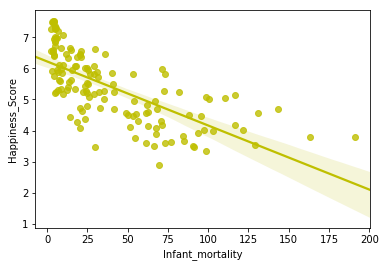

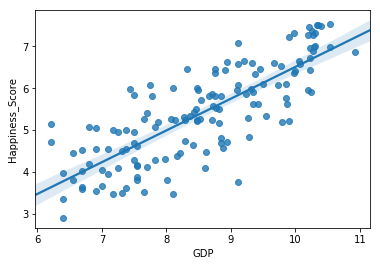

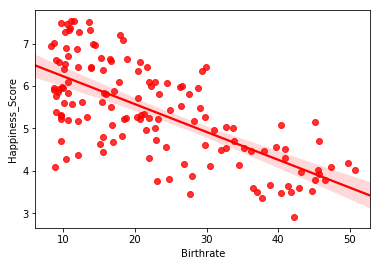

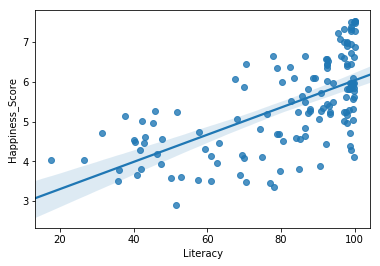

In [64]:
sns.regplot(x= 'Infant_mortality', y="Happiness_Score", data=df_happy,color='y');
plt.show();
sns.regplot(x= "GDP", y="Happiness_Score", data=df_happy); #log_gdp
plt.show();
sns.regplot(x= 'Birthrate', y="Happiness_Score", data=df_happy, color="r");
plt.show();
sns.regplot(x= 'Literacy', y="Happiness_Score", data=df_happy);
plt.show();

I will check if adding GINI coeeficient can improve the model. I will scrape this information

In [65]:
from bs4 import BeautifulSoup
import requests
import re

In [66]:
#requesting information from indexmundi.com for the list of World Gini Coefficient 
html_page = requests.get('https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings')
#using the html parser of Beutiful Soup
soup = BeautifulSoup(html_page.content, 'html.parser')

In [67]:
#writnin a function to parse the page information:
def get_text():
    #scrape all tags with ('table')
    titles = soup.find_all('table')  
    countries = []
    for i in range(len(titles)):
        
        texts = titles[i].get_text()
        
        countries.append(texts)
    return countries

In [68]:
list1=get_text()
list1= list1[0].split('\n') 
list1= list(filter(None, list1))
list1.remove('Rank')
list1.remove('Country')
list1.remove('Value')
list1.remove('Year')
list1[0:10]

['1',
 'South Africa',
 '63.40',
 '2011',
 '2',
 'Namibia',
 '61.00',
 '2009',
 '3',
 'Botswana']

In [69]:
#erasing every 4th elemnt in list. I would like to stay only with countries and GINI
del list1[0::4]
list1[0:5]

['South Africa', '63.40', '2011', 'Namibia', '61.00']

In [70]:
#erasing every 3th element in list
del list1[2::3]
list1[0:5]

['South Africa', '63.40', 'Namibia', '61.00', 'Botswana']

In [71]:
#Creating a dictionary from the list
import itertools
import operator
d = dict(itertools.zip_longest(*[iter(list1)] * 2, fillvalue=""))
d

{'South Africa': '63.40',
 'Namibia': '61.00',
 'Botswana': '60.50',
 'Suriname': '57.60',
 'Zambia': '57.10',
 'Central African Republic': '56.20',
 'Lesotho': '54.20',
 'Belize': '53.30',
 'Swaziland': '51.50',
 'Brazil': '51.30',
 'Colombia': '51.10',
 'Panama': '51.00',
 'Guinea-Bissau': '50.70',
 'Rwanda': '50.40',
 'Honduras': '50.10',
 'Congo': '48.90',
 'Guatemala': '48.70',
 'Kenya': '48.50',
 'Costa Rica': '48.20',
 'Mexico': '48.20',
 'Paraguay': '48.00',
 'Benin': '47.80',
 'Chile': '47.70',
 'The Gambia': '47.30',
 'Cabo Verde': '47.20',
 'Venezuela': '46.90',
 'Seychelles': '46.80',
 'Nicaragua': '46.60',
 'Ecuador': '46.50',
 'Cameroon': '46.50',
 'Malaysia': '46.30',
 'Malawi': '46.10',
 'Bolivia': '45.80',
 'Mozambique': '45.60',
 'Jamaica': '45.50',
 'Comoros': '45.00',
 'Dominican Republic': '44.90',
 'Guyana': '44.50',
 'Peru': '44.30',
 'Djibouti': '44.10',
 'Chad': '43.30',
 'Zimbabwe': '43.20',
 'Togo': '43.00',
 'Nigeria': '43.00',
 'Angola': '42.70',
 'Madagasc

In [72]:
#creatin pandas dataframe from the dictionary
d1 = pd.DataFrame.from_dict(d,orient='index')

In [73]:
d1 = d1.reset_index()
d1.head()

,index,0
0,South Africa,63.40
1,Namibia,61.00
2,Botswana,60.50
3,Suriname,57.60
4,Zambia,57.10


In [74]:
#renaming the columns
d1.columns = ['Country', 'GINI']
d1.head(2)

,Country,GINI
0,South Africa,63.40
1,Namibia,61.00


In [75]:
#changing the values in the GINI column from strings to floats
d1['GINI']= d1['GINI'].astype(float)
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 2 columns):
Country    158 non-null object
GINI       158 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [76]:
#adding the GINI data to the working Dataframe
df_happy = df_happy.merge(d1,on=['Country'], how='inner')
len(df_happy)

125

C:\Users\homer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


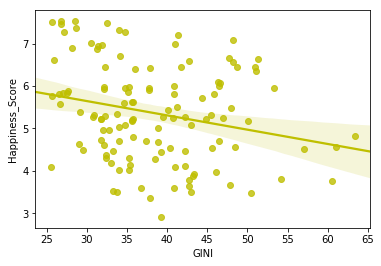

In [77]:
sns.regplot(x= 'GINI', y="Happiness_Score", data=df_happy, color='y');

In [78]:
#checking the new model with GINI
d_regions = 'region_NEAR_EAST+region_SUB_SAHARAN_AFRICA'
X = 'scaled_GDP_interact+scaled_Literacy + scaled_Deathrate+GINI+'+d_regions

In [79]:
lr_model = ols(formula='Happiness_Score ~'+X , data=df_happy).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     51.31
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           1.26e-30
Time:                        18:05:04   Log-Likelihood:                -112.68
No. Observations:                 125   AIC:                             239.4
Df Residuals:                     118   BIC:                             259.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.3819      0.356     12.307      0.000       3.677       5.087
scaled_GDP_interact           3.0239      0.348      8.679      0.000       2.334       3.714
scaled_Literacy               0.4038      0.318      1.270      0.207      -0.226       1.033
scaled_Deathrate             -1.2824      0.414     -3.095      0.002      -2.103      -0.462
GINI                          0.0163      0.008      2.052      0.042       0.001       0.032
region_NEAR_EAST             -0.4337      0.246     -1.762      0.081      -0.921       0.054
region_SUB_SAHARAN_AFRICA    -0.5641      0.224     -2.519      0.013      -1.007      -0.121
==============================================================================
Omnibus:                        3.499   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                3.535
Skew:                          -0.390   Prob(JB):                        0.171
Kurtosis:                       2.733   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#we will check with GINI will work better as polinomial variable. 
df_happy["GINI_S"] = df_happy["GINI"]**2 +df_happy["GINI"]
df_happy['scaled_GINI_S'] = (df_happy['GINI_S']-df_happy['GINI_S'].min())/(df_happy['GINI_S'].max()-df_happy['GINI_S'].min())

In [81]:
df_happy['scaled_region_NEAR_EAST'] = (df_happy['region_NEAR_EAST']-df_happy['region_NEAR_EAST'].min())/(df_happy['region_NEAR_EAST'].max()-df_happy['region_NEAR_EAST'].min())
df_happy['scaled_region_SUB_SAHARAN_AFRICA'] = (df_happy['region_SUB_SAHARAN_AFRICA']-df_happy['region_SUB_SAHARAN_AFRICA'].min())/(df_happy['region_SUB_SAHARAN_AFRICA'].max()-df_happy['region_SUB_SAHARAN_AFRICA'].min())

In [82]:
#we will also try the model without the literacy factor and birth_mortality which had relativlely high probability
d_regions = 'scaled_region_NEAR_EAST+scaled_region_SUB_SAHARAN_AFRICA'
X = 'scaled_GDP_interact+ scaled_Deathrate + scaled_GINI_S+'+ d_regions
lr_model = ols(formula='Happiness_Score ~'+X , data=df_happy).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     62.08
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           1.53e-31
Time:                        18:05:14   Log-Likelihood:                -112.68
No. Observations:                 125   AIC:                             237.4
Df Residuals:                     119   BIC:                             254.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            5.0826      0.154     32.956      0.000       4.777       5.388
scaled_GDP_interact                  3.2509      0.299     10.870      0.000       2.659       3.843
scaled_Deathrate                    -1.2938      0.411     -3.150      0.002      -2.107      -0.481
scaled_GINI_S                        0.8760      0.304      2.879      0.005       0.273       1.479
scaled_region_NEAR_EAST             -0.4663      0.243     -1.915      0.058      -0.948       0.016
scaled_region_SUB_SAHARAN_AFRICA    -0.6815      0.200     -3.401      0.001      -1.078      -0.285
==============================================================================
Omnibus:                        3.701   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                3.703
Skew:                          -0.412   Prob(JB):                        0.157
Kurtosis:                       2.822   Cond. No.                         9.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I was able to get an Adjusted R squared of 0.711 of a model with only 5 variables